# Geoprocesamiento Python

In [2]:
import geopandas as gpd

In [3]:
shp_distrito = r"D:\PYTHON\sig_python\Datos_Espaciales\Formato\SHP\Distrito_Ucayali.shp"

In [11]:
# Cargar archivo shp
data_distrito = gpd.read_file(shp_distrito)

In [21]:
data_distrito.head(3)

,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMPRO,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO,geometry
0,2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,2502,25,LEY 6251,1928/10/22 00:00:00.000,1456490.000,250201,"POLYGON ((709089.500 8879380.000, 709388.125 8..."
1,3.0,430997.380855,7.659283e+09,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250203,2502,25,LEY 9815,1943/07/02 00:00:00.000,765928.250,250203,"POLYGON ((637909.956 8945148.739, 637913.399 8..."
2,4.0,866293.074394,1.845954e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250401,2504,25,LEY 30720,2018/01/11 00:00:00.000,1845954.125,250401,"POLYGON ((993808.480 8955074.597, 993816.750 8..."


In [14]:
data_distrito.columns

Index(['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'ZONUTM', 'FUENTE', 'OBSERV',
       'DOCREG', 'FECREG', 'ORIGEN', 'NOMDIS', 'NOMPRO', 'NOMDEP', 'LEYCRE',
       'FECCRE', 'SUPSIG', 'UBIGEO', 'geometry'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt

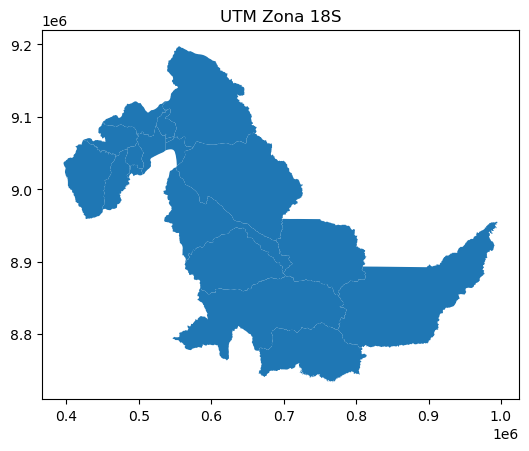

In [16]:
# Plot in original crs
data_distrito.plot()
plt.title("UTM Zona 18S")
plt.show()

## Disolver shapefile

In [23]:
# Conduct the aggregation
disolve_provincia = data_distrito.dissolve(by="NOMPRO")
disolve_region = data_distrito.dissolve(by="NOMDEP")
# What did we get
disolve_provincia.head(3)

,geometry,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO
NOMPRO,,,,,,,,,,,,,,,,
2501,"POLYGON ((689025.037 8929027.723, 689038.130 8...",7.0,143063.509660,6.599271e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250107,25,LEY 28753,2006/06/06 00:00:00.000,6.597909e+04,250107
2502,"POLYGON ((775096.750 8805805.000, 775096.893 8...",2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,25,LEY 6251,1928/10/22 00:00:00.000,1.456490e+06,250201
2503,"POLYGON ((504800.631 9028201.384, 504800.338 9...",13.0,85919.348494,2.086686e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250305,25,LEY 30310,2015/03/17 00:00:00.000,2.086686e+04,250305


In [24]:
print("Numero distrito:", len(data_distrito))
print("Numero Provincia:", len(disolve_provincia))
print("Numero Region:", len(disolve_region))

Numero distrito: 17
Numero Provincia: 4
Numero Region: 1


In [27]:
import os

In [28]:
os.getcwd()

'D:\\PYTHON\\sig_python\\Script'

In [30]:
os.chdir(r"D:\PYTHON\sig_python\Datos_Espaciales\Resultado")

In [31]:
# Save to disk
disolve_provincia.to_file("Provincia")
disolve_region.to_file("Region")

## Seleccion de un poligono y exportar

<AxesSubplot:>

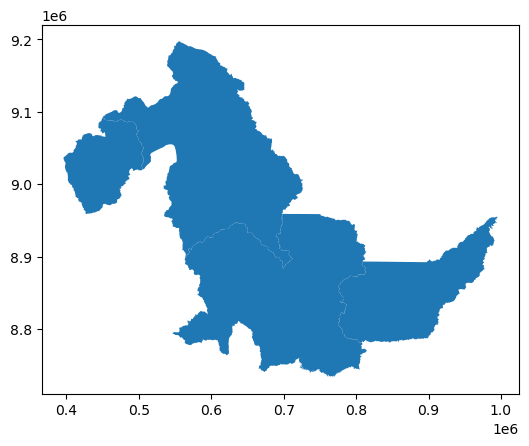

In [34]:
disolve_provincia.plot()

In [37]:
disolve_provincia.index

Index(['2501', '2502', '2503', '2504'], dtype='object', name='NOMPRO')

In [38]:
# Seleccion codigo provincia 2502
disolve_provincia.loc["2502"]

geometry      POLYGON ((775096.7501999997 8805805.0002, 7750...
OBJECTID                                                    2.0
SHAPE_Leng                                        846966.904411
SHAPE_Area                                   14564900331.612354
ZONUTM                                                       18
FUENTE                                Gobierno Regional Ucayali
OBSERV                                                     None
DOCREG                                          Ley de creación
FECREG                                                     None
ORIGEN                                                        2
NOMDIS                                                   250201
NOMDEP                                                       25
LEYCRE                                                 LEY 6251
FECCRE                                  1928/10/22 00:00:00.000
SUPSIG                                                1456490.0
UBIGEO                                  

In [39]:
# Create a GeoDataFrame
Provincia_2502 = gpd.GeoDataFrame([disolve_provincia.loc["2502"]], crs=disolve_provincia.crs)

<AxesSubplot:>

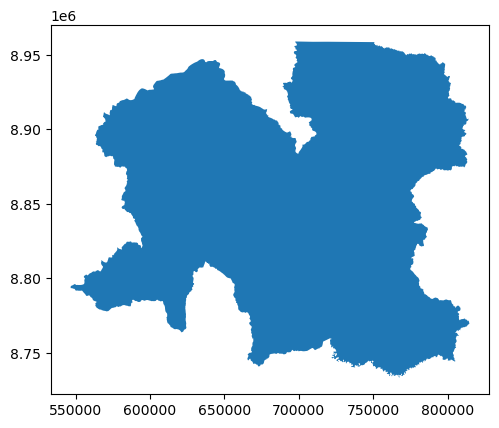

In [41]:
Provincia_2502.plot()

In [45]:
# Seleccion por campo de atributo
Provincia_2503 = data_distrito[data_distrito["NOMPRO"] == "2503"]

<AxesSubplot:>

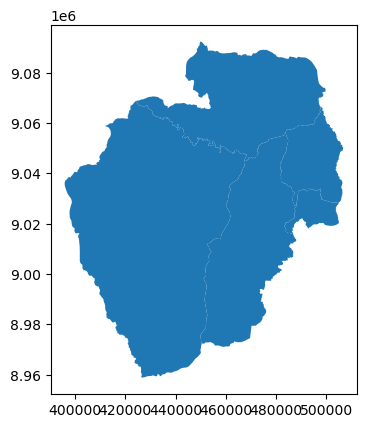

In [46]:
Provincia_2503.plot()

In [47]:
# Save to disk
Provincia_2502.to_file("Provincia_2502")
Provincia_2503.to_file("Provincia_2503")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Visualizacion en el Mapa

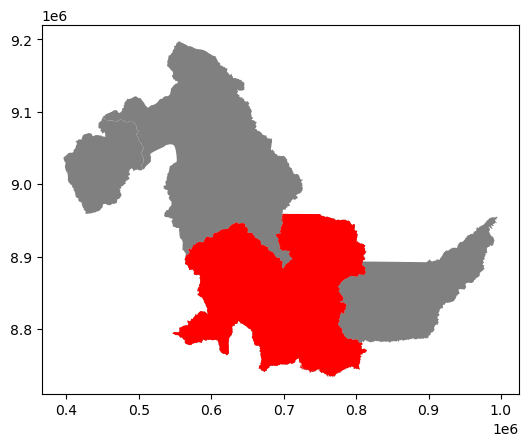

In [49]:
# Visualizacion en el mapa
ax = disolve_provincia.plot(facecolor="gray")
Provincia_2502.plot(ax=ax, facecolor="red")
plt.show()

## UNION

In [50]:
import os

In [51]:
Ruta = r"D:\PYTHON\sig_python\Datos_Espaciales\Geoprocesamiento"

In [52]:
os.chdir(Ruta)

In [53]:
Poligono1 = gpd.read_file("POLIGONO1.shp")
Poligono2 = gpd.read_file("POLIGONO2.shp")

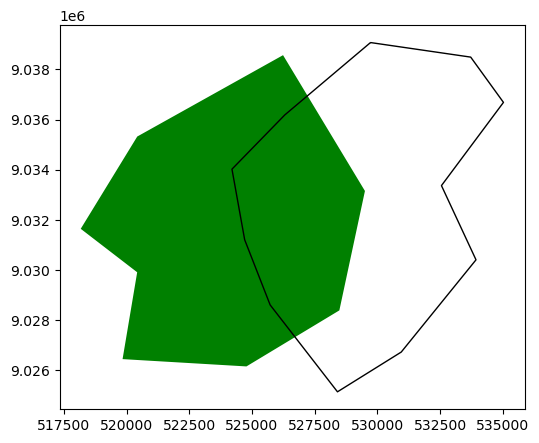

In [55]:
# Visualizacion en el mapa
ax = Poligono1.plot(figsize=(6,6),facecolor="green")
Poligono2.plot(ax=ax, facecolor="None")
plt.show()

In [56]:
Poligono_unido = Poligono1.union(Poligono2)

In [57]:
# Save to disk
Poligono_unido.to_file("Poligono_unido")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


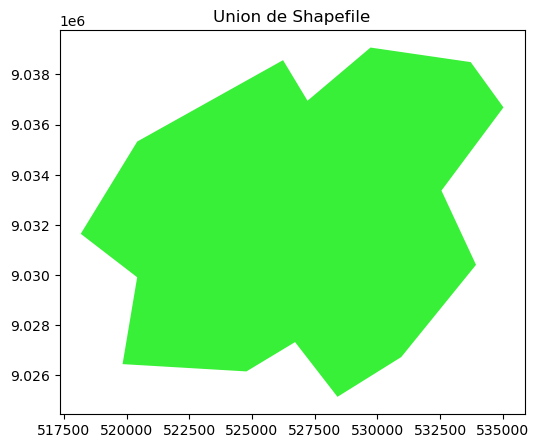

In [58]:
# Visualizacion en el mapa
Poligono_unido.plot(figsize=(6,6),facecolor="#38f038")
plt.title("Union de Shapefile")
plt.show()

## Diferencia

In [59]:
Diferencia = Poligono2.difference(Poligono1)

In [60]:
# Save to disk
Diferencia.to_file("Diferencia")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


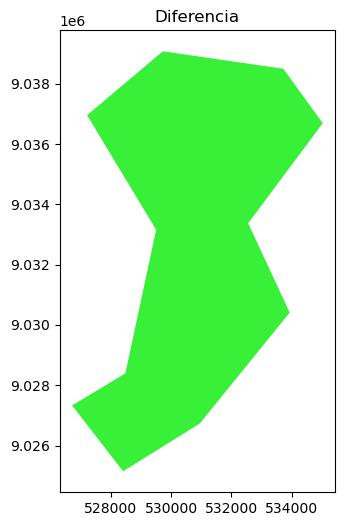

In [61]:
# Visualizacion en el mapa
Diferencia.plot(figsize=(6,6),facecolor="#38f038")
plt.title("Diferencia")
plt.show()

## Interseccion

In [62]:
Interset = Poligono1.intersection(Poligono2)

In [63]:
# Save to disk
Interset.to_file("Interset")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


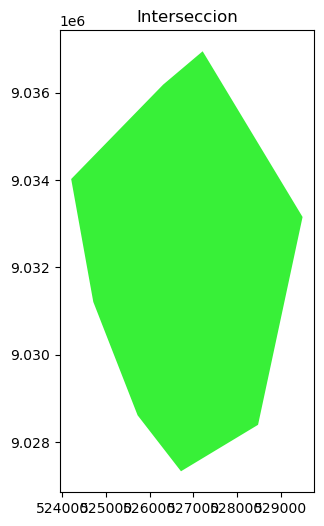

In [64]:
# Visualizacion en el mapa
Interset.plot(figsize=(6,6),facecolor="#38f038")
plt.title("Interseccion")
plt.show()

## Diferencia simetrica

In [65]:
Diferencia_simetrica = Poligono1.symmetric_difference(Poligono2)

In [ ]:
# Save to disk
Diferencia_simetrica.to_file("Diferencia_simetrica")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


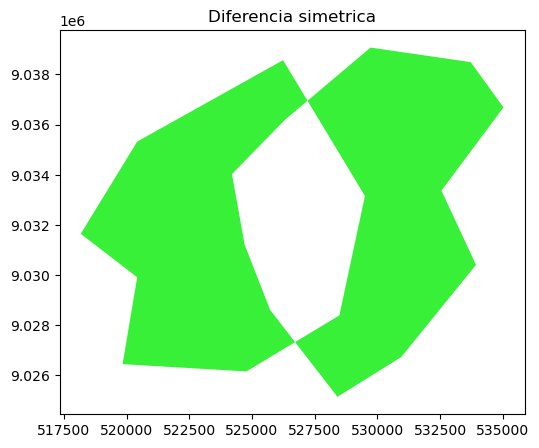

In [ ]:
# Visualizacion en el mapa
Diferencia_simetrica.plot(figsize=(6,6),facecolor="#38f038")
plt.title("Diferencia simetrica")
plt.show()

## Recortar zona Clip

In [71]:
os.chdir(r"D:\PYTHON\sig_python\Datos_Espaciales\Geoprocesamiento")

In [72]:
Puntos = gpd.read_file("Puntos.shp")
Linea = gpd.read_file("LINEA.shp")
Predios = gpd.read_file("Predios.shp")

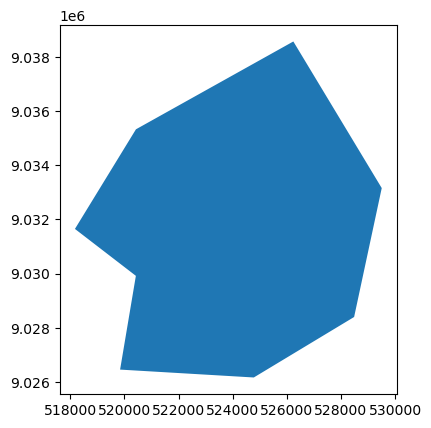

In [81]:
Poligono1.plot()
plt.show()

In [82]:
Poligono1_union = Poligono1.geometry.unary_union

In [84]:
# Recortar shp de puntos
Puntos_poly1 = Puntos[Puntos.geometry.intersects(Poligono1_union)]

In [85]:
# Recortar lineas y poligono
Linea_poly1 = Linea.intersection(Poligono1_union)
Predios_poly1 = Predios.intersection(Poligono1_union)

In [86]:
Puntos.shape

(23, 2)

In [87]:
Puntos_poly1.shape

(10, 2)

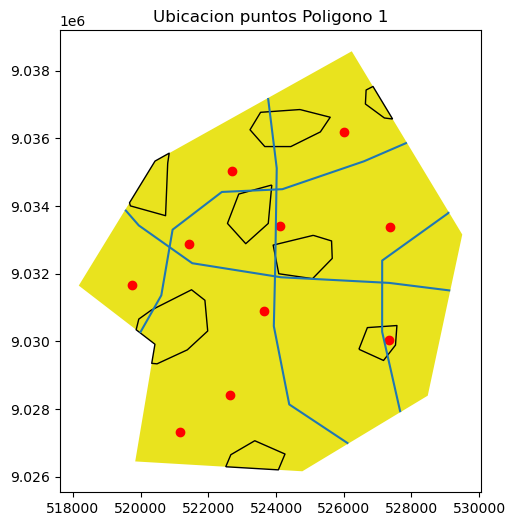

In [88]:
# Visualizacion en el mapa
ax = Poligono1.plot(figsize=(6,6),facecolor="#e9e31e")
Puntos_poly1.plot(ax=ax, facecolor="red")
Linea_poly1.plot(ax=ax, facecolor="None")
Predios_poly1.plot(ax=ax, facecolor="None")
plt.title("Ubicacion puntos Poligono 1")
plt.show()

In [89]:
# Save to disk
Puntos_poly1.to_file("Puntos_clip")
Linea_poly1.to_file("Linea_clip")
Predios_poly1.to_file("Predios_clip")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Merge

In [90]:
import os, glob

In [91]:
os.chdir(r"D:\PYTHON\sig_python\Datos_Espaciales\Geoprocesamiento\Curva_Nivel")

In [92]:
lista = glob.glob("*.shp")
lista

['Curva_1.shp', 'Curva_2.shp', 'Curva_3.shp', 'Curva_4.shp']

In [93]:
lista_shp = []
for i in lista:
    shp = gpd.read_file(i)
    lista_shp.append(shp)

In [95]:
import pandas as pd

In [96]:
# Archivo merge
shp_merge = gpd.GeoDataFrame(pd.concat(lista_shp))

<AxesSubplot:>

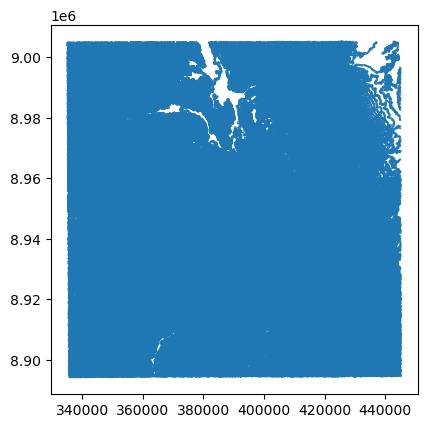

In [98]:
shp_merge.plot()

In [99]:
# Save to disk
shp_merge.to_file("Curva_nivel_total")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Zona de influencia - Buffer

### Puntos Buffer

In [103]:
Puntos.head()

,id,geometry
0,1,POINT (520986.864 9037040.469)
1,2,POINT (524620.784 9039131.704)
2,3,POINT (527377.988 9033391.893)
3,4,POINT (527339.447 9030036.039)
4,5,POINT (532283.889 9036203.189)


In [104]:
# Realizar el buffer a 1000m y disolver
Puntos_1000 = Puntos.buffer(1000)

<AxesSubplot:>

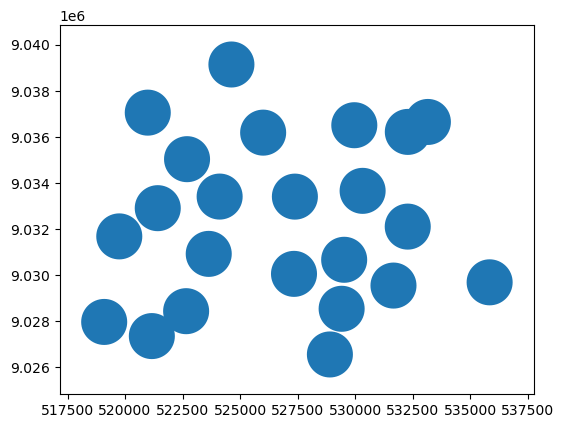

In [110]:
Puntos_1000.plot()

In [111]:
# Save to disk
Puntos_1000.to_file("Puntos1000")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [112]:
# Union de poligono
Puntos_1000_dis = Puntos_1000.unary_union

In [113]:
Puntos_1000_unido = gpd.GeoDataFrame({'geometry': [Puntos_1000_dis]}, 
                                     crs=32718)
Puntos_1000_unido

,geometry
0,"MULTIPOLYGON (((536838.225 9029668.706, 536833..."


<AxesSubplot:>

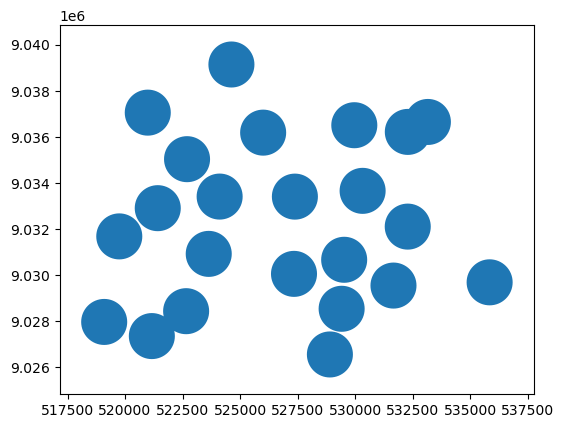

In [115]:
# es una solo geometria
Puntos_1000_unido.plot()

In [116]:
# Save to disk
Puntos_1000_unido.to_file("Puntos_1000_unido")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Linea Buffer

In [118]:
Linea_poly_1000_1 = Linea_poly1.buffer(1000)
Linea_poly_1000_2 = Linea_poly1.buffer(1000,join_style=2)
Linea_poly_1000_3 = Linea_poly1.buffer(1000,join_style=3)

<AxesSubplot:>

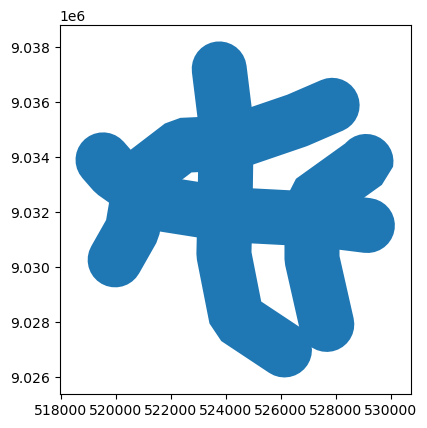

In [121]:
Linea_poly_1000_3.plot()

In [122]:
Linea_poly_1000_1.to_file("Linea_1000_1")
Linea_poly_1000_2.to_file("Linea_1000_2")
Linea_poly_1000_3.to_file("Linea_1000_3")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [123]:
# Union de poligono
Linea_poly_1000_1_dis = Linea_poly_1000_1.unary_union

In [124]:
Linea_poly_1000_unido = gpd.GeoDataFrame({'geometry': [Linea_poly_1000_1_dis]}, 
                                     crs=32718)
Linea_poly_1000_unido

,geometry
0,"POLYGON ((526220.221 9032786.003, 526246.546 9..."


In [125]:
Linea_poly_1000_unido.to_file("Linea_poly_1000_unido")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Poligono Buffer

In [126]:
Predios_copy = Predios.copy()

In [127]:
Predios_copy.head()

,id,geometry
0,1,"POLYGON ((526448.398 9029764.706, 526698.249 9..."
1,2,"POLYGON ((532454.130 9027778.012, 532226.377 9..."
2,3,"POLYGON ((533539.853 9033786.620, 532895.965 9..."
3,4,"POLYGON ((522393.006 9026008.890, 522663.557 9..."
4,5,"POLYGON ((520316.979 9030924.618, 521502.147 9..."


In [128]:
Predios_500_1 = Predios_copy.buffer(500)
Predios_500_2 = Predios_copy.buffer(500,join_style=2)
Predios_500_3 = Predios_copy.buffer(500,join_style=3)

In [129]:
Predios_500_1.to_file("Predios_500_1")
Predios_500_2.to_file("Predios_500_2")
Predios_500_3.to_file("Predios_500_3")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [130]:
Predios_500_2 = Predios_500_2.unary_union

In [132]:
Predios_500_unido = gpd.GeoDataFrame({'geometry': [Predios_500_2]}, 
                                     crs=32718)
Predios_500_unido

,geometry
0,"MULTIPOLYGON (((521742.842 9025755.039, 522267..."


In [133]:
Predios_500_unido.to_file("Predios_500_unido")

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
